In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import re
import json
np.set_printoptions(precision = 4, suppress = True)
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20
pd.options.display.max_colwidth = 80
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

In [190]:
music_study = pd.read_csv("C:/Users/jaspr/Desktop/Jaspreet/Miscellaneous/Books/Coding_Books/Studies/MUSIC/subject-info.csv", index_col= "Patient ID", sep = ";")
music_study.head()

,Follow-up period from enrollment (days),days_4years,Exit of the study,Cause of death,SCD_4years SinusRhythm,HF_4years SinusRhythm,Age,Gender (male=1),Weight (kg),Height (cm),...,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181
Patient ID,,,,,,,,,,,,,,,,,,,,,
P0001,2065,1460,NaN,0,0,0,58,1,83,163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P0002,2045,1460,NaN,0,0,0,58,1,74,160,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P0003,2044,1460,NaN,0,0,0,69,1,83,174,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P0004,2044,1460,NaN,0,0,0,56,0,84,165,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P0005,2043,1460,NaN,0,0,0,70,1,97,183,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [191]:
data = music_study.iloc[:, 0:104]
data.columns.tolist()

['Follow-up period from enrollment (days)',
 'days_4years',
 'Exit of the study',
 'Cause of death',
 'SCD_4years SinusRhythm',
 'HF_4years SinusRhythm',
 'Age',
 'Gender (male=1)',
 'Weight (kg)',
 'Height (cm)',
 'Body Mass Index (Kg/m2)',
 'NYHA class',
 'Diastolic blood  pressure (mmHg)',
 'Systolic blood pressure (mmHg)',
 'HF etiology - Diagnosis',
 'Diabetes (yes=1)',
 'History of dyslipemia (yes=1)',
 'Peripheral vascular disease (yes=1)',
 'History of hypertension (yes=1)',
 'Prior Myocardial Infarction (yes=1)',
 'Prior implantable device',
 'Prior Revascularization',
 'Syncope',
 'daily smoking (cigarretes/day)',
 'smoke-free time (years)',
 'cigarettes /year',
 'alcohol consumption (standard units)',
 'Albumin (g/L)',
 'ALT or GPT (IU/L)',
 'AST or GOT (IU/L)',
 'Normalized Troponin',
 'Total Cholesterol (mmol/L)',
 'Creatinine (?mol/L)',
 'Gamma-glutamil transpeptidase (IU/L)',
 'Glucose (mmol/L)',
 'Hemoglobin (g/L)',
 'HDL (mmol/L)',
 'Potassium (mEq/L)',
 'LDL (mmol/L)'

In [192]:
data.isna().sum()

Follow-up period from enrollment (days)      0
days_4years                                  0
Exit of the study                          695
Cause of death                               0
SCD_4years SinusRhythm                       0
                                          ... 
Spironolactone (yes=1)                       0
Statins (yes=1)                              0
Hidralazina (yes=1)                          0
ACE inhibitor (yes=1)                        0
Nitrovasodilator (yes=1)                     0
Length: 104, dtype: int64

In [193]:
# data['Age'].dtype
# Using masking to assign new value to Series with dtype Int64
# data.Age[data['Age'] == '>89'] = 90
# Using str.replace method to assign new value to Series with dtype Object
data['Age'] = data['Age'].str.replace('>89', '90')
data['Age'].dtype
data['Age'].value_counts()

71    46
73    44
72    44
69    42
58    37
      ..
90     1
18     1
26     1
23     1
87     1
Name: Age, Length: 63, dtype: int64

In [194]:
pd.value_counts(data['Exit of the study'].fillna(0))

0.0    695
3.0    266
2.0     20
1.0     11
Name: Exit of the study, dtype: int64

In [195]:
# Rename columns (creates transformed dataframe wihout changing the original dataframe)
# data = data.rename(columns = {'Gender (male=1)': 'Gender', 'LVEF (%)': 'LVEF'})
# data.loc[data.Gender == 1, 'Gender'] = "Male"
# data.loc[data['Gender'] == 0, 'Gender'] = "Female"
# data.head()

In [196]:
# pd.value_counts(data['Gender'], dropna=False)

In [197]:
# To select rows from a dataframe column or index using Boolean masking
data.Age[data['Weight (kg)'] > 110].value_counts().sort_index()

39    1
40    1
43    1
44    1
45    2
51    2
57    1
58    3
65    2
66    1
71    1
Name: Age, dtype: int64

In [198]:
# Selecting columns 
# data1 = data.loc[:, ['Age', 'Gender', 'Weight (kg)', 'Height (cm)', 'Body Mass Index (Kg/m2)', 'NYHA class', 
#                      'Diastolic blood  pressure (mmHg)', 'Systolic blood pressure (mmHg)', 'HF etiology - Diagnosis',
#                      'Diabetes (yes=1)']]
# # Modifying the columns or index attribute in place
# data1.columns = ['Age', 'Gender', 'Weight(kg)', 'Height(cm)', 'BMI(Kg/m2)', 'NYHA class', 
#                      'DBP(mmHg)', 'SBP(mmHg)', 'HF', 'Diabetes']
# # Replacing comma with decimal point and change the dataframe column/Series to numeric object
# data1['BMI(Kg/m2)'] = pd.to_numeric(data1['BMI(Kg/m2)'].str.replace(',', '.'))
# # Replacing string and change the dataframe column/Series to categorical type
# data1['Age'] = (data1['Age'].str.replace('>89', '90')).astype('category')

In [199]:
# data2 = data1.pivot_table(index=['Age', "Gender"], columns= ['NYHA class'], 
#                          values= ['BMI(Kg/m2)', 'DBP(mmHg)', 'SBP(mmHg)'],
#                          aggfunc=['max', 'min'], fill_value= 0, margins=False).dropna()


In [200]:
# # Using IndexSlice object to select the lower levels
# idx = pd.IndexSlice
# data2.loc[idx[:, 'Female'], idx[:, 'BMI(Kg/m2)']]

In [201]:
# Checking dtype of the columns
data.Age.dtype

dtype('O')

In [202]:
data['Age'] = data['Age'].astype('Int64')
# data['LVEF'] = data['LVEF'].fillna(0).astype('Int64')
age_median = data['Age'].median()
# lvef_median = data['LVEF'].median()
# data.LVEF.dtype

In [203]:
data['days_4years'].value_counts()

1460    703
304       3
475       3
248       3
215       3
       ... 
110       1
1269      1
892       1
651       1
1365      1
Name: days_4years, Length: 253, dtype: int64

In [204]:
# Use Series map function to create a column. Use both dict and function
study_status = {1:'Stage1', 2:'Stage2', 3:'Stage3', None: 'uncomplete', 'missing':'uncomplete'}
data['Study_completion_stage'] = data['Exit of the study'].map(study_status)
data['Study_completion_stage'].value_counts()

Stage3    266
Stage2     20
Stage1     11
Name: Study_completion_stage, dtype: int64

In [205]:
def status(x):
    return study_status[x]
data['Study_completion_stage'] = (data['Exit of the study'].fillna('missing')).map(status)
data['Study_completion_stage'].value_counts()

uncomplete    695
Stage3        266
Stage2         20
Stage1         11
Name: Study_completion_stage, dtype: int64

In [206]:
data_model = music_study.loc[:, [ 'Age', 'Gender (male=1)', 'Weight (kg)', 'Height (cm)', 'Body Mass Index (Kg/m2)', 'NYHA class',
 'Diastolic blood  pressure (mmHg)', 'Systolic blood pressure (mmHg)', 'HF etiology - Diagnosis', 'Diabetes (yes=1)',
 'History of dyslipemia (yes=1)', 'Left atrial size (mm)', 'Right ventricle contractility (altered=1)',
 'Right ventricle end-diastolic diameter (mm)', 'LVEF (%)', 'Left ventricular posterior wall thickness (mm)',
 'Septal thickness (mm)', 'Left ventricle end-diastolic diameter (mm)', 'Left ventricle end-systolic diameter (mm)']]

In [207]:
data_model.columns = [ 'Age', 'Gender', 'Weight(kg)', 'Height(cm)', 'BMI(Kg/m2)', 'NYHAclass',
 'DBP(mmHg)', 'SBP(mmHg)', 'HF', 'Diabetes', 'Dyslipemia', 'Left_atrial_size(mm)', 'Right_ventricle_contractility_altered',
 'RVEDD(mm)', 'LVEF(%)', 'LVPWT(mm)', 'Septal_thickness(mm)', 'LVEDD(mm)', 'LVESD(mm)']
data_model.head()

,Age,Gender,Weight(kg),Height(cm),BMI(Kg/m2),NYHAclass,DBP(mmHg),SBP(mmHg),HF,Diabetes,Dyslipemia,Left_atrial_size(mm),Right_ventricle_contractility_altered,RVEDD(mm),LVEF(%),LVPWT(mm),Septal_thickness(mm),LVEDD(mm),LVESD(mm)
Patient ID,,,,,,,,,,,,,,,,,,,
P0001,58,1,83,163,"31,2",3,75,110,1,0,0,50.0,0.0,24.0,35.0,10.0,10.0,72.0,60.0
P0002,58,1,74,160,"28,9",2,80,130,2,0,1,39.0,0.0,24.0,35.0,12.0,14.0,54.0,38.0
P0003,69,1,83,174,"27,4",2,75,100,1,0,0,41.0,0.0,20.0,39.0,9.0,10.0,55.0,44.0
P0004,56,0,84,165,"30,9",2,75,155,8,1,1,43.0,0.0,24.0,38.0,13.0,11.0,56.0,46.0
P0005,70,1,97,183,29,2,85,125,2,1,1,55.0,0.0,25.0,34.0,11.0,11.0,73.0,67.0


In [208]:
data_model.Age[data_model['Age'] == '>89'] 

Patient ID
P0167    >89
Name: Age, dtype: object

In [209]:
data_model['Age'] = data_model['Age'].str.replace('>89', '90')
data_model.Age[data_model['Age'] == '90'] 

Patient ID
P0167    90
Name: Age, dtype: object

In [210]:
data_model['BMI(Kg/m2)'] = data_model['BMI(Kg/m2)'].str.replace(',', '.')
data_model.head()

,Age,Gender,Weight(kg),Height(cm),BMI(Kg/m2),NYHAclass,DBP(mmHg),SBP(mmHg),HF,Diabetes,Dyslipemia,Left_atrial_size(mm),Right_ventricle_contractility_altered,RVEDD(mm),LVEF(%),LVPWT(mm),Septal_thickness(mm),LVEDD(mm),LVESD(mm)
Patient ID,,,,,,,,,,,,,,,,,,,
P0001,58,1,83,163,31.2,3,75,110,1,0,0,50.0,0.0,24.0,35.0,10.0,10.0,72.0,60.0
P0002,58,1,74,160,28.9,2,80,130,2,0,1,39.0,0.0,24.0,35.0,12.0,14.0,54.0,38.0
P0003,69,1,83,174,27.4,2,75,100,1,0,0,41.0,0.0,20.0,39.0,9.0,10.0,55.0,44.0
P0004,56,0,84,165,30.9,2,75,155,8,1,1,43.0,0.0,24.0,38.0,13.0,11.0,56.0,46.0
P0005,70,1,97,183,29,2,85,125,2,1,1,55.0,0.0,25.0,34.0,11.0,11.0,73.0,67.0


In [211]:
data_model['Age'] = data_model['Age'].astype('int64')
data_model['BMI(Kg/m2)'] = data_model['BMI(Kg/m2)'].astype('float64')

In [212]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 992 entries, P0001 to P1083
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age                                    992 non-null    int64  
 1   Gender                                 992 non-null    int64  
 2   Weight(kg)                             992 non-null    int64  
 3   Height(cm)                             992 non-null    int64  
 4   BMI(Kg/m2)                             992 non-null    float64
 5   NYHAclass                              992 non-null    int64  
 6   DBP(mmHg)                              992 non-null    int64  
 7   SBP(mmHg)                              992 non-null    int64  
 8   HF                                     992 non-null    int64  
 9   Diabetes                               992 non-null    int64  
 10  Dyslipemia                             992 non-null    int64  
 11  Left_

In [213]:
# X = data_model.drop(columns= ['Dyslipemia'])
# y = data_model['Dyslipemia']

In [214]:
pd.isna(data_model).sum()

Age                                        0
Gender                                     0
Weight(kg)                                 0
Height(cm)                                 0
BMI(Kg/m2)                                 0
NYHAclass                                  0
DBP(mmHg)                                  0
SBP(mmHg)                                  0
HF                                         0
Diabetes                                   0
Dyslipemia                                 0
Left_atrial_size(mm)                      10
Right_ventricle_contractility_altered     18
RVEDD(mm)                                119
LVEF(%)                                    3
LVPWT(mm)                                 20
Septal_thickness(mm)                      20
LVEDD(mm)                                  7
LVESD(mm)                                117
dtype: int64

In [215]:
predictors = [ 'Age', 'Gender', 'Weight(kg)', 'Height(cm)', 'BMI(Kg/m2)', 'NYHAclass',
 'DBP(mmHg)', 'SBP(mmHg)', 'HF', 'Diabetes']

In [216]:
X = data_model[predictors].to_numpy()
y = data_model['Dyslipemia'].to_numpy()
y[:10]

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [217]:
from sklearn.linear_model import LogisticRegressionCV
model_cv = LogisticRegressionCV(Cs=10)
model_cv.fit(X, y)

C:\Users\jaspr\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jaspr\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegressionCV()

In [218]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
model = LogisticRegression(C=10)
scores = cross_val_score(model, X, y, cv=4)
scores

C:\Users\jaspr\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jaspr\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.629 , 0.625 , 0.6008, 0.5806])

In [219]:
data_model.query('Age > 50 and NYHAclass == 2').head()

,Age,Gender,Weight(kg),Height(cm),BMI(Kg/m2),NYHAclass,DBP(mmHg),SBP(mmHg),HF,Diabetes,Dyslipemia,Left_atrial_size(mm),Right_ventricle_contractility_altered,RVEDD(mm),LVEF(%),LVPWT(mm),Septal_thickness(mm),LVEDD(mm),LVESD(mm)
Patient ID,,,,,,,,,,,,,,,,,,,
P0002,58,1,74,160,28.9,2,80,130,2,0,1,39.0,0.0,24.0,35.0,12.0,14.0,54.0,38.0
P0003,69,1,83,174,27.4,2,75,100,1,0,0,41.0,0.0,20.0,39.0,9.0,10.0,55.0,44.0
P0004,56,0,84,165,30.9,2,75,155,8,1,1,43.0,0.0,24.0,38.0,13.0,11.0,56.0,46.0
P0005,70,1,97,183,29.0,2,85,125,2,1,1,55.0,0.0,25.0,34.0,11.0,11.0,73.0,67.0
P0006,70,1,83,165,30.5,2,75,105,2,1,0,50.0,0.0,30.0,34.0,13.0,13.0,65.0,57.0


In [220]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

In [221]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [222]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.6612903225806451

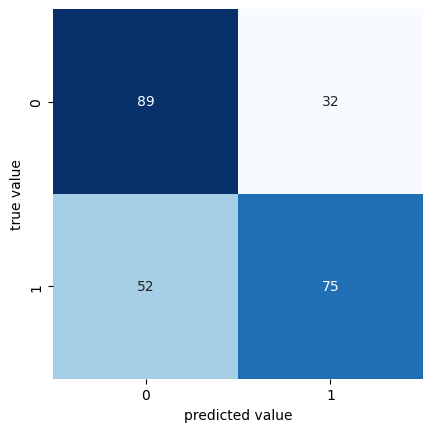

In [223]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='Blues')
plt.xlabel('predicted value')
plt.ylabel('true value');

In [224]:
mat

array([[89, 32],
       [52, 75]], dtype=int64)

In [225]:
data_model['Right_ventricle_contractility_altered'].value_counts()

0.0    747
1.0    227
Name: Right_ventricle_contractility_altered, dtype: int64

In [226]:
data_model['NYHAclass'].value_counts()


2    778
3    214
Name: NYHAclass, dtype: int64

In [227]:
NYHAclass = pd.get_dummies(data_model['NYHAclass'])
NYHAclass.head()

,2,3
Patient ID,,
P0001,0,1
P0002,1,0
P0003,1,0
P0004,1,0
P0005,1,0


In [228]:
data_model['HF'].unique()

array([1, 2, 8, 3, 6, 9, 7, 4, 5], dtype=int64)

In [229]:
data_model.loc[data_model['HF'] == 1, "HF"] = 0
data_model.loc[data_model['HF'] > 1, "HF"] = 1
data_model.HF.unique()

array([0, 1], dtype=int64)

In [230]:
data_model1 = data_model.drop(columns= "NYHAclass")
data_model2 = data_model1.join(NYHAclass.add_prefix("NYHAclass_"))
data_model2.head()

,Age,Gender,Weight(kg),Height(cm),BMI(Kg/m2),DBP(mmHg),SBP(mmHg),HF,Diabetes,Dyslipemia,Left_atrial_size(mm),Right_ventricle_contractility_altered,RVEDD(mm),LVEF(%),LVPWT(mm),Septal_thickness(mm),LVEDD(mm),LVESD(mm),NYHAclass_2,NYHAclass_3
Patient ID,,,,,,,,,,,,,,,,,,,,
P0001,58,1,83,163,31.2,75,110,0,0,0,50.0,0.0,24.0,35.0,10.0,10.0,72.0,60.0,0,1
P0002,58,1,74,160,28.9,80,130,1,0,1,39.0,0.0,24.0,35.0,12.0,14.0,54.0,38.0,1,0
P0003,69,1,83,174,27.4,75,100,0,0,0,41.0,0.0,20.0,39.0,9.0,10.0,55.0,44.0,1,0
P0004,56,0,84,165,30.9,75,155,1,1,1,43.0,0.0,24.0,38.0,13.0,11.0,56.0,46.0,1,0
P0005,70,1,97,183,29.0,85,125,1,1,1,55.0,0.0,25.0,34.0,11.0,11.0,73.0,67.0,1,0


In [231]:
data_model2.isna().sum()

Age                                        0
Gender                                     0
Weight(kg)                                 0
Height(cm)                                 0
BMI(Kg/m2)                                 0
DBP(mmHg)                                  0
SBP(mmHg)                                  0
HF                                         0
Diabetes                                   0
Dyslipemia                                 0
Left_atrial_size(mm)                      10
Right_ventricle_contractility_altered     18
RVEDD(mm)                                119
LVEF(%)                                    3
LVPWT(mm)                                 20
Septal_thickness(mm)                      20
LVEDD(mm)                                  7
LVESD(mm)                                117
NYHAclass_2                                0
NYHAclass_3                                0
dtype: int64

In [251]:
# data_model2 = data_model2.fillna({'Left_atrial_size(mm)': data_model2['Left_atrial_size(mm)'].mean(),
#                                  'Right_ventricle_contractility_altered': data_model2['Right_ventricle_contractility_altered'].ffill(),
#                                  'RVEDD(mm)': data_model2['RVEDD(mm)'].mean(),
#                                  'LVEF(%)': data_model2['LVEF(%)'].mean(),
#                                  'LVPWT(mm)': data_model2['LVPWT(mm)'].ffill(),
#                                  'Septal_thickness(mm)': data_model2['Septal_thickness(mm)'].mean(),
#                                  'LVEDD(mm)': data_model2['LVEDD(mm)'].mean(),
#                                  'LVESD(mm)': data_model2['LVESD(mm)'].mean()})
# data_model2.head()

,Age,Gender,Weight(kg),Height(cm),BMI(Kg/m2),DBP(mmHg),SBP(mmHg),HF,Diabetes,Dyslipemia,Left_atrial_size(mm),Right_ventricle_contractility_altered,RVEDD(mm),LVEF(%),LVPWT(mm),Septal_thickness(mm),LVEDD(mm),LVESD(mm),NYHAclass_2,NYHAclass_3
Patient ID,,,,,,,,,,,,,,,,,,,,
P0001,58,1,83,163,31.2,75,110,0,0,0,50.0,0.0,24.0,35.0,10.0,10.0,72.0,60.0,0,1
P0002,58,1,74,160,28.9,80,130,1,0,1,39.0,0.0,24.0,35.0,12.0,14.0,54.0,38.0,1,0
P0003,69,1,83,174,27.4,75,100,0,0,0,41.0,0.0,20.0,39.0,9.0,10.0,55.0,44.0,1,0
P0004,56,0,84,165,30.9,75,155,1,1,1,43.0,0.0,24.0,38.0,13.0,11.0,56.0,46.0,1,0
P0005,70,1,97,183,29.0,85,125,1,1,1,55.0,0.0,25.0,34.0,11.0,11.0,73.0,67.0,1,0


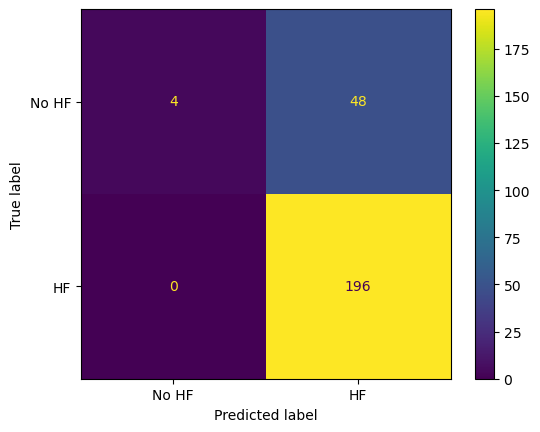

In [233]:
X = data_model2.drop("HF", axis=1)
y = data_model2['HF']

from sklearn.impute import SimpleImputer
imp= SimpleImputer(strategy='mean')
X = imp.fit_transform(X)


from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)
scaler = preprocessing.StandardScaler().fit(Xtrain)
Xtrain_scaled = scaler.transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

from sklearn.svm import SVC
clf_svm = SVC(random_state=42)
clf_svm.fit(Xtrain_scaled, ytrain)

ConfusionMatrixDisplay.from_estimator(clf_svm, Xtest_scaled, ytest, display_labels= ["No HF", "HF"] )



In [234]:
num_features = np.size(Xtrain_scaled, axis=1)
num_features

19

In [235]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1, 10, 100, 1000],
             'gamma': [1/num_features, 1, 0.1, .01, .001, .0001],
             'kernel': ['rbf']}

grid = GridSearchCV(
    SVC(), 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    verbose=0
)


grid.fit(Xtrain_scaled, ytrain)
print(grid.best_params_)

# model=grid.best_estimator_
# yfit= model.predict(Xtest)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


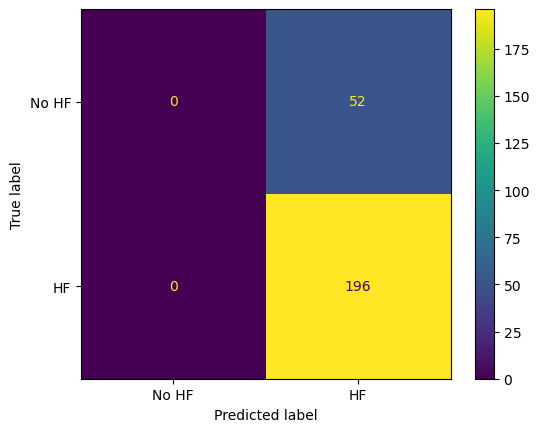

In [236]:
clf_svm = SVC(random_state=42, C=10, gamma=0.001 )
clf_svm.fit(Xtrain_scaled, ytrain)

ConfusionMatrixDisplay.from_estimator(clf_svm, Xtest_scaled, ytest, display_labels= ["No HF", "HF"] )

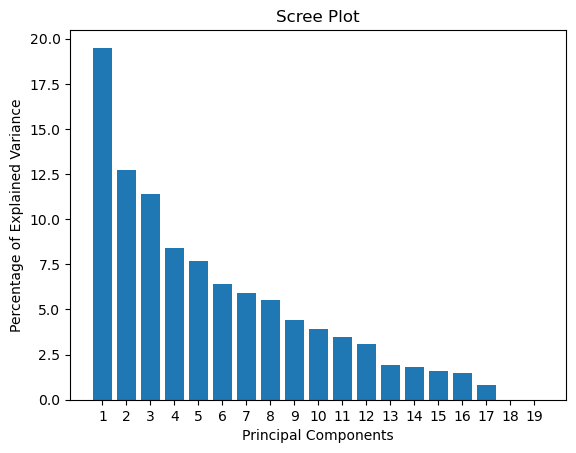

In [243]:
pca = PCA()
Xtrain_pca = pca.fit_transform(Xtrain_scaled)

per_var= np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1, len(per_var)+1), height= per_var, tick_label= labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

In [253]:
train_pc1_coords = Xtrain_pca[:, 0]
train_pc2_coords = Xtrain_pca[:, 1]

train_pca_scaled = preprocessing.scale(np.column_stack((train_pc1_coords, train_pc2_coords)))

num_features = np.size(train_pca_scaled, axis=1)
num_features

2

In [248]:
param_grid = {'C': [1, 10, 100, 1000],
             'gamma': [1/num_features, 1, 0.1, .01, .001, .0001, 0.00001],
             'kernel': ['rbf']}

grid = GridSearchCV(
    SVC(), 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    verbose=0
)


grid.fit(train_pca_scaled, ytrain)
print(grid.best_params_)

{'C': 1000, 'gamma': 1e-05, 'kernel': 'rbf'}


In [250]:
clf_svm = SVC(random_state=42, C=1000, gamma=0.00001)
clf_svm.fit(train_pca_scaled, ytrain)

SVC(C=1000, gamma=1e-05, random_state=42)

In [267]:
Xtest_pca = pca.transform(Xtest_scaled)
Xtest_pc1_coords = Xtest_pca[:, 0]
Xtest_pc2_coords = Xtest_pca[:, 1]

x_min = Xtest_pc1_coords.min() - 1
x_max = Xtest_pc1_coords.max() + 1

y_min = Xtest_pc2_coords.min() - 1
y_max = Xtest_pc2_coords.max() + 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                    np.arange(start=y_min, stop=y_max, step=0.1))
Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))
Z = Z.reshape(xx.shape)

In [268]:
Z.shape

(115, 123)

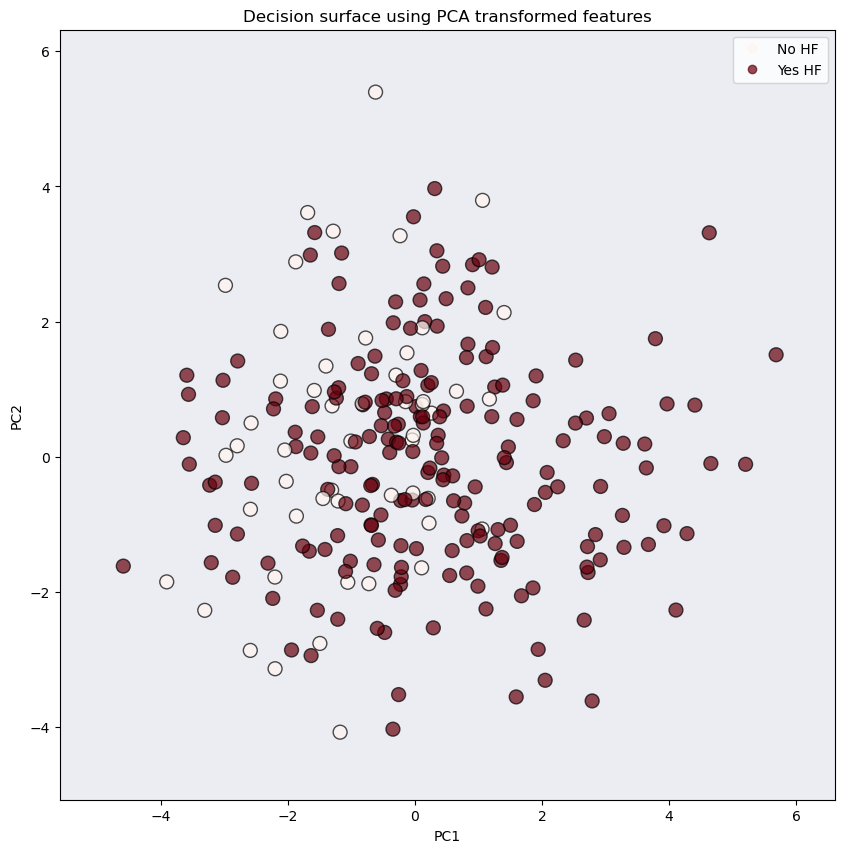

In [277]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.contourf(xx, yy, Z, alpha=0.1, )

scatter = ax.scatter(Xtest_pc1_coords, Xtest_pc2_coords, c= ytest, cmap= "Reds", s= 100, edgecolors= 'k', alpha=0.7)
legend = ax.legend(scatter.legend_elements()[0],
                  scatter.legend_elements()[1],
                  loc= 'upper right')
legend.get_texts()[0].set_text("No HF")
legend.get_texts()[1].set_text("Yes HF")

ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title("Decision surface using PCA transformed features")
plt.show()

